/anaconda3/lib/python3.6/site-packages/pykalman/unscented.py:867: RuntimeWarning: covariance is not positive-semidefinite.
  observation_covariance.newbyteorder('=')


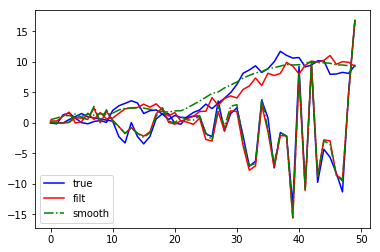

In [26]:
import numpy as np
import pylab as pl
from pykalman import UnscentedKalmanFilter

# initialize parameters
def transition_function(state, noise):
    a = np.sin(state[0]) + state[1] * noise[0]
    b = state[1] + noise[1]
    return np.array([a, b])

def observation_function(state, noise):
    C = np.array([[-1, 0.5], [0.2, 0.1]])
    return np.dot(C, state) + noise

transition_covariance = np.eye(2)
random_state = np.random.RandomState(0)
observation_covariance = np.eye(2) + random_state.randn(2, 2) * 0.1
initial_state_mean = [0, 0]
initial_state_covariance = [[1, 0.1], [-0.1, 1]]

# sample from model
kf = UnscentedKalmanFilter(
    transition_function, observation_function,
    transition_covariance, observation_covariance,
    initial_state_mean, initial_state_covariance,
    random_state=random_state
)
states, observations = kf.sample(50, initial_state_mean)

# estimate state with filtering and smoothing
filtered_state_estimates = kf.filter(observations)[0]
smoothed_state_estimates = kf.smooth(observations)[0]

# draw estimates
pl.figure()
lines_true = pl.plot(states, color='b')
lines_filt = pl.plot(filtered_state_estimates, color='r', ls='-')
lines_smooth = pl.plot(smoothed_state_estimates, color='g', ls='-.')
pl.legend((lines_true[0], lines_filt[0], lines_smooth[0]),
          ('true', 'filt', 'smooth'),
          loc='lower left'
)
pl.show()

In [28]:
states

array([[  0.        ,   0.        ],
       [  0.        ,  -0.15135721],
       [ -0.02180203,   1.3029163 ],
       [  0.55651633,   1.63659063],
       [  1.04059509,   0.78249489],
       [  1.53912223,   0.04032987],
       [  1.00134385,  -0.14685398],
       [  0.81944166,   0.23130854],
       [  0.65028976,   0.38765751],
       [  0.4552669 ,   0.08535475],
       [  0.29406377,   2.03613015],
       [ -2.26101046,   2.81362051],
       [ -3.29061277,   3.200523  ],
       [  0.05827131,   3.62885487],
       [ -2.24362448,   3.26611371],
       [ -3.43789051,   1.53983111],
       [ -2.21824873,   2.00261336],
       [  0.66246352,   2.13159627],
       [  1.47269109,   1.44678618],
       [  0.54444164,   1.50295152],
       [  1.21780862,  -0.03329216],
       [  0.89909992,  -0.213217  ],
       [  0.86873127,   1.00922807],
       [  1.12316518,   1.71580124],
       [  1.11923087,   2.1177906 ],
       [ -1.79085611,   3.08718731],
       [ -2.25280367,   2.3397325 ],
 